In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector 
import sqlalchemy as sa
import os 

In [2]:
connection = mysql.connector.connect(host='18.136.157.135',
                                    user='dm_team2',
                                    password='DM!$Team&27@9!20!',
                                    database='project_sales')

In [3]:
data=pd.read_sql_query('show tables',connection)
print(data)

  Tables_in_project_sales
0                    data


In [4]:
query="select*from data"

In [5]:
data=pd.read_sql(query,connection)

In [6]:
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [7]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [8]:
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25,Website,,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [9]:
data.dtypes

Created          object
Product_ID       object
Source           object
Mobile           object
EMAIL            object
Sales_Agent      object
Location         object
Delivery_Mode    object
Status           object
dtype: object

In [10]:
data.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [12]:
data.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [13]:
data.shape

(7422, 9)

In [14]:
data.drop(['Mobile'],axis =1,inplace = True)
data.drop(['EMAIL'],axis =1,inplace = True)
data.drop(['Created'],axis =1,inplace = True)

In [15]:
data.replace('',np.nan,inplace=True)
data.dropna(inplace=True)
data.reset_index(inplace=True,drop=True)
data.shape

(7328, 6)

In [16]:
replacements = {
    'Live Chat': ['Live Chat-Direct', 'Live Chat-Google Organic', 'Live Chat -PPC', 'Live Chat-Blog', 
                  'Live Chat-Quora', 'Live Chat-CPC', 'Live Chat-Google Ads', 
                  'Live Chat-Adwords Remarketing', 'Live Chat-Youtube', 'Live Chat-Justdial'],
    'Existing Customer': ['Existing Client', 'CRM form', 'Personal Contact'],
    'Customer Referral': 'By Recommendation',
    'Website': ['US Website', 'Just Dial'],
    'Campaign': ['E-mail Campaign', 'SMS Campaign', 'E-Mail Message', 'Other']
}

for new_value, old_values in replacements.items():
    data['Source'] = data['Source'].replace(to_replace=old_values, value=new_value)

In [17]:
data.Location.replace(['UAE','USA','UK','AUSTRALIA','Singapore','Malaysia','EUROPE'],'Foreign',inplace=True)
data.Location.replace(['Howrah','Kolkata','Trivandrum'],'Other Locations',inplace=True)

In [18]:
data.Product_ID.replace(['8','6','3','17','22','11','7','28','0','23','24','16','13','4','14','26','12','2','21','25'],
                        'Less Sold Product',inplace=True)

In [19]:
#Defie the  'Status' as 'Good' or 'Bad'
data.Status.replace(['CONVERTED','converted','In Progress Positive','Potential','Long Term','Open'],'Good',inplace=True)
data.Status.replace(['LOST','In Progress Negative','Not Responding','Junk Lead','Just Enquiry'],'Bad',inplace=True)

In [20]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9,Live Chat,Sales-Agent-3,Bangalore,Mode-1,Good
1,19,Call,Sales-Agent-4,Other Locations,Mode-5,Good
2,18,Website,Sales-Agent-11,Other Locations,Mode-1,Good
3,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Bad
4,18,Call,Sales-Agent-7,Bangalore,Mode-1,Good


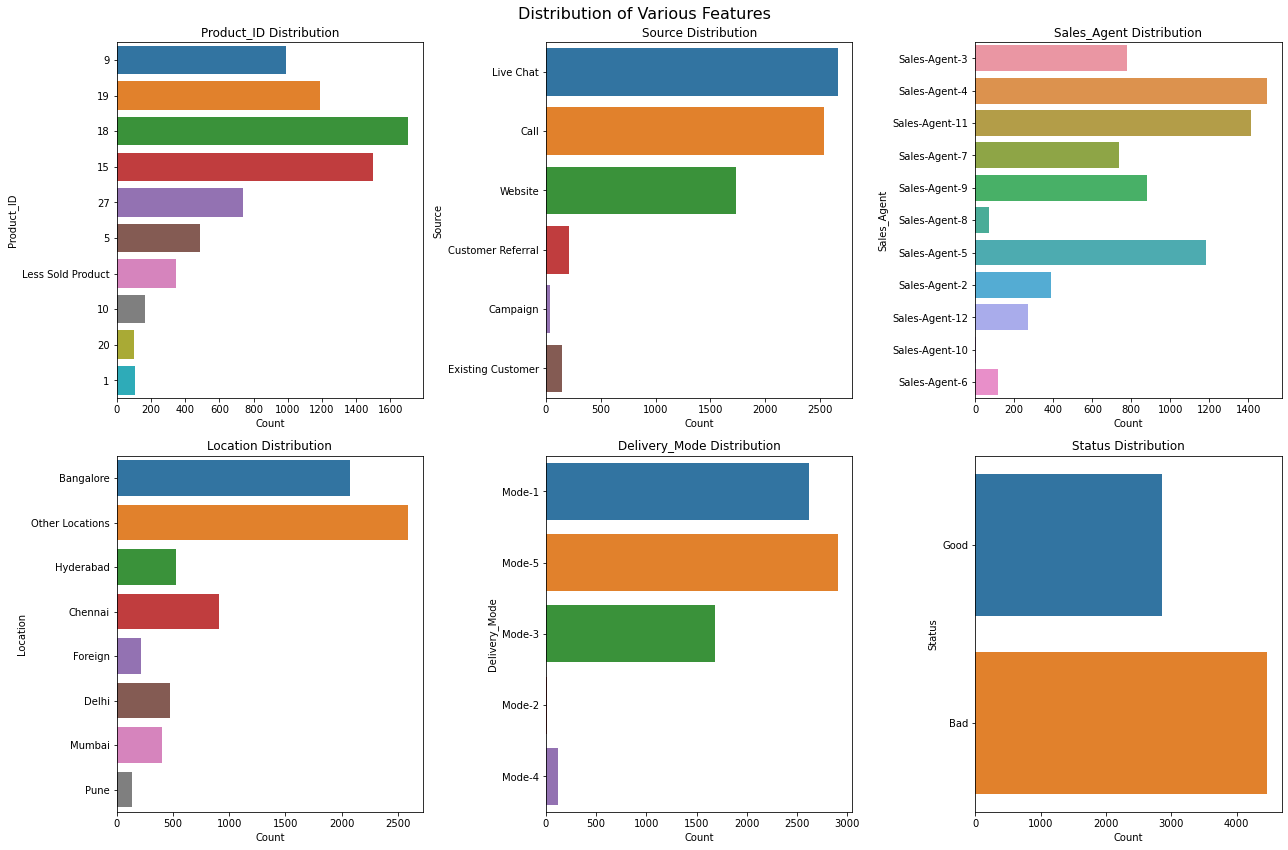

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribution of Various Features', fontsize=16)

columns_to_plot = ['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode', 'Status']

for i, col in enumerate(columns_to_plot):
    row = i // 3
    col_pos = i % 3
    
    sns.countplot(data=data, y=col, ax=axes[row, col_pos])
    axes[row, col_pos].set_title(f'{col} Distribution')
    axes[row, col_pos].set_xlabel('Count')

plt.tight_layout()
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
columns_to_encode = [0, 1, 2, 3, 4, 5]

for col in columns_to_encode:
    data.iloc[:, col] = label_encoder.fit_transform(data.iloc[:, col])

data.head()


,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,8,4,4,0,0,1
1,4,0,5,6,4,1
2,3,5,1,6,0,1
3,2,5,8,4,0,0
4,3,0,8,0,0,1


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7328 entries, 0 to 7327
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Product_ID     7328 non-null   int32
 1   Source         7328 non-null   int32
 2   Sales_Agent    7328 non-null   int32
 3   Location       7328 non-null   int32
 4   Delivery_Mode  7328 non-null   int32
 5   Status         7328 non-null   int32
dtypes: int32(6)
memory usage: 171.9 KB


In [24]:
data.corr()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
Product_ID,1.000000,0.074868,0.056065,-0.226961,-0.181464,0.138943
Source,0.074868,1.000000,-0.023186,-0.003034,-0.216516,-0.015411
Sales_Agent,0.056065,-0.023186,1.000000,-0.140876,-0.224688,0.137074
Location,-0.226961,-0.003034,-0.140876,1.000000,0.414193,-0.347418
Delivery_Mode,-0.181464,-0.216516,-0.224688,0.414193,1.000000,-0.220445
Status,0.138943,-0.015411,0.137074,-0.347418,-0.220445,1.000000


In [25]:
y = data.Status
X = data.iloc[:,[0,1,2,3,4]]

In [28]:
from sklearn.model_selection import train_test_split

# Splitting into training and testing data for accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [29]:
# Splitting into training and testing data for accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [30]:
X_train.shape

(5129, 5)

In [31]:
X_test.shape

(2199, 5)

In [35]:
from imblearn.over_sampling import SMOTE

# SMOTE for sampling technique
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [36]:
X_train.shape

(6294, 5)

In [37]:
X_test.shape

(2199, 5)